# Food Type Analysis (WHAT)
**Objective:**  
Analyze which food types are most popular and identify the time periods when they sell best.This helps the business plan targeted promotions and menu strategies.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [4]:
df = pd.read_csv("../data/zomato_cleaned_features.csv")
df['Order_Hour'] = df['Order_Hour'].fillna(0).astype(int)
df[['Type_of_order', 'Order_Hour', 'Order_Day']].head().style.hide(axis="index")

Type_of_order,Order_Hour,Order_Day
Snack,21,Saturday
Meal,14,Sunday
Drinks,17,Friday
Buffet,9,Sunday
Snack,19,Monday


Type_of_order
Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: count, dtype: int64


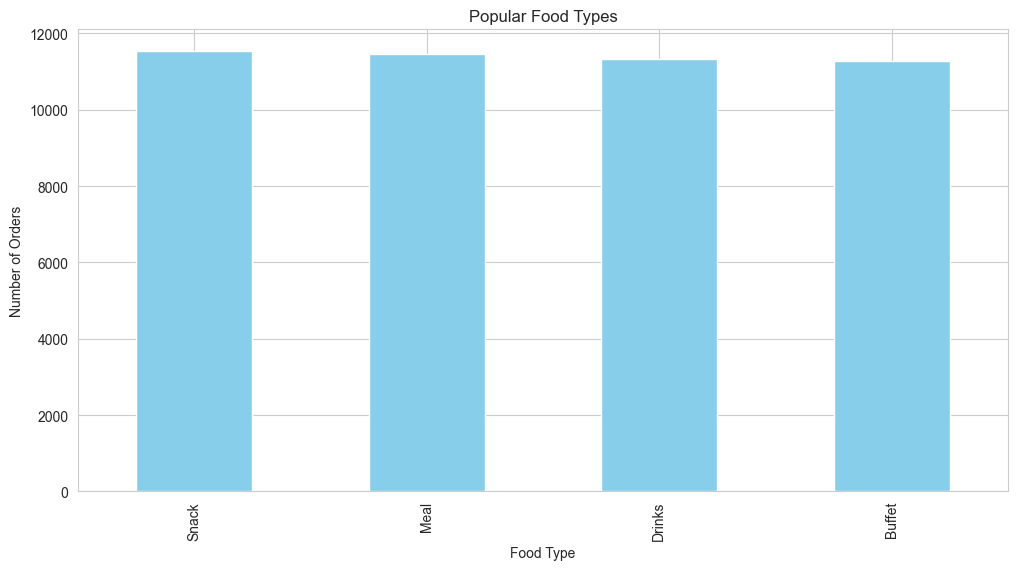

In [12]:
# Popular Food Types
food_counts = df['Type_of_order'].value_counts()

top_food = food_counts.head()
print(top_food)

top_food.plot(kind='bar', color='skyblue')
plt.xlabel("Food Type")
plt.ylabel("Number of Orders")
plt.title("Popular Food Types")
plt.show()

**Insight:**  
The number of orders for each food type is pretty close, with only a few hundred difference. Snack comes out on top as the most popular.

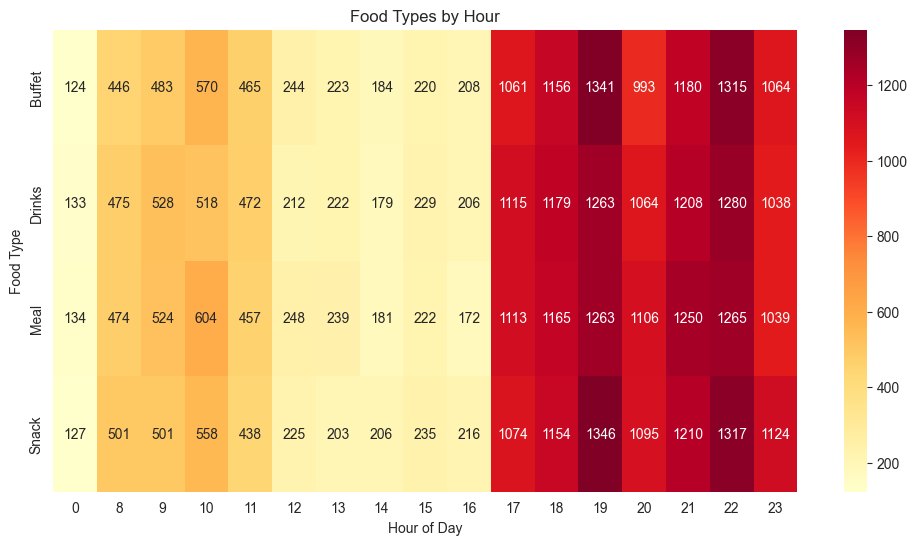

In [13]:
# Food Types by Hour for dentify Peak Ordering Times
pivot_food_hour = df.pivot_table(
    index = 'Type_of_order',
    columns = 'Order_Hour',
    values = 'ID',
    aggfunc = 'count',
    fill_value = 0
)

sns.heatmap(pivot_food_hour, cmap='YlOrRd', annot=True, fmt='d')
plt.title("Food Types by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Food Type")
plt.show()

**Insight:**  
Orders peak between 17:00 and 23:00 for all food types. Snack and Buffet are the most popular, especially around 19:00 and 22:00. The lowest number of orders is usually between 12:00 and 16:00.

In [24]:
promotion_candidates = pivot_food_hour.copy()
golden_hours = list(range(17,24))

promotion_candidates['Golden_Hours_Total_Order'] = promotion_candidates[golden_hours].sum(axis=1)
promotion_candidates_clean = promotion_candidates[['Golden_Hours_Total_Order']].reset_index()
promotion_candidates_clean = promotion_candidates_clean.sort_values(by='Golden_Hours_Total_Order', ascending=False)

promotion_candidates_clean.style.background_gradient(cmap='YlOrRd').hide(axis="index")

Type_of_order,Golden_Hours_Total_Order
Snack,8320
Meal,8201
Drinks,8147
Buffet,8110


**Insight:**  
During the golden hours (17:00–23:00), Snack gets the most orders, with Meal, Drinks, and Buffet not far behind. This shows that Snack is the top performer in the peak evening period and should be prioritized for promotions.

## Summary

### Key Insights
- **Popular Food Types:** Snack -> Meal -> Drinks -> Buffet have similar order volumes, with only a few hundred difference.
- **Peak Hours:** 17:00–23:00 show the highest orders for all food types, with Snack and Buffet leading. Especially around around 19:00 and 22:00.
- **Off-Peak Hours:** 12:00–16:00 consistently have the lowest order.
- **Observation:** Although Buffet peaks clearly at 19:00 and 22:00 in the food type by hour heatmap, its total orders across all Golden Hours (17:00–23:00) are slightly the lowest. This shows Buffet demand is concentrated in specific hours rather than spread evenly.

### Recommendation
- **Focus promotions during peak hours (17:00–23:00):** Snack and Buffet should be prioritized, with special attention to 19:00 and 22:00 peaks.
- **Consider time-specific promotions for Buffet:** Since Buffet has concentrated peaks, short-term deals or bundles at peak hours can maximize revenue.
- **Leverage off-peak hours cautiously:** Introduce limited promotions between 12:00–16:00 to increase orders without overspending on marketing.